In [33]:
import qmcpy as qp
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt

import latex_util as lu
import plot_util as pu
import data_util as du
import quantlib_util as qlu
import qmcpy_util as qpu
import config as cf

import averaged_mae as am
from matplotlib.ticker import FixedLocator, FixedFormatter

In [15]:
cf.is_debug = True

In [18]:
import importlib
importlib.reload(am)

<module 'averaged_mae' from '/Users/laramatiukha/Documents/GitHub/QMCSoftware/demos/GBM/averaged_mae.py'>

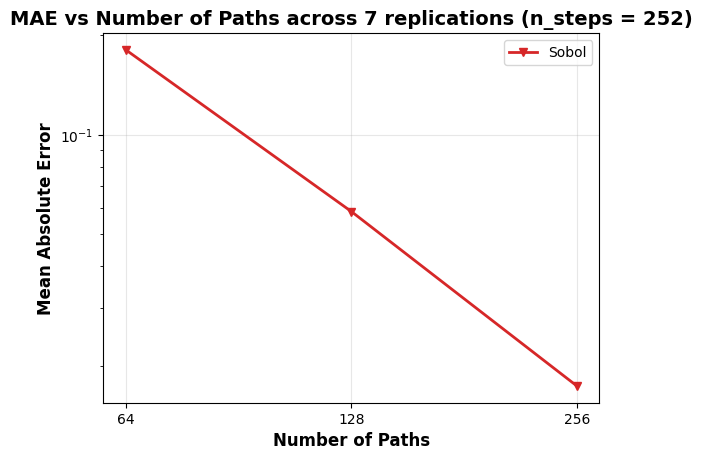

In [37]:
styling = pu.get_plot_styling()
colors = styling['colors']['QMCPy']
markers = styling['markers']['QMCPy']
#samplers = cf.get_sampler_configurations()['all_samplers'] 
samplers = ['Sobol']
replications = 7

fig, ax = plt.subplots()

for sampler in samplers:
    n_paths_range, mean_errors = am.compute_mae_vs_paths(sampler_type=sampler, replications=replications)
    
    ax.loglog(
        n_paths_range,
        mean_errors,
        marker=markers.get(sampler),
        color=colors.get(sampler),
        linewidth=2,
        markersize=6,
        label=sampler
    )


ax.xaxis.set_major_locator(FixedLocator(n_paths_range))
ax.xaxis.set_major_formatter(FixedFormatter([str(int(x)) for x in n_paths_range]))
ax.xaxis.set_minor_locator(FixedLocator([]))  


ax.set_xlabel("Number of Paths", fontsize=12, fontweight='bold')
ax.set_ylabel("Mean Absolute Error", fontsize=12, fontweight='bold')
ax.set_title(f"MAE vs Number of Paths across {replications} replications (n_steps = 252)", fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

plt.show()

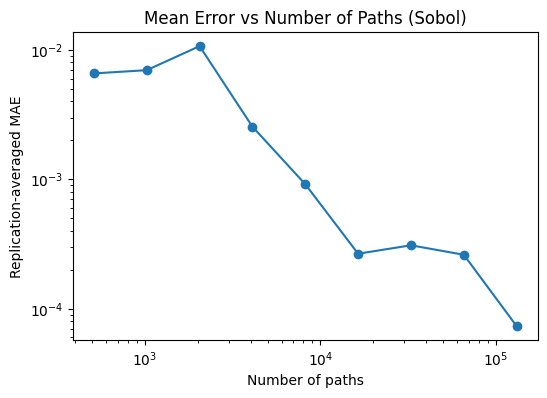

In [34]:

#n_paths_range = [2**8, 2**9, 2**10, 2**11, 2**12]
n_paths_range = [2**i for i in range(9, 18)]
sampler = 'Sobol'
mean_errors = am.compute_mean_error_vs_paths(n_paths_range, sampler_type=sampler, replications=1)

plt.figure(figsize=(6,4))
plt.loglog(n_paths_range, mean_errors, marker='o')
plt.xlabel('Number of paths')
plt.ylabel('Replication-averaged MAE')
plt.title(f'Mean Error vs Number of Paths ({sampler})')
plt.show()
